# Função aggregate_time_series

<h2 align="center"><font color="#FF8B00">&#8779; &#8779; &#8779;</font></h2>

Antes de executar o código desta seção, fazer o upload do arquivo estacoes_plv.zip, conforme o comando a seguir.

In [ ]:
#!unzip estacoes_plv.zip

import zipfile
with zipfile.ZipFile('estacoes_plv.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import pandas as pd

def aggregate_time_series(in_filename, temporal_res, start_timestamp, end_timestamp):
  df = pd.read_csv(in_filename)

  # Create a timestamp column
  df["Datetime"] = df["Dia"] + " " + df["Hora"]
  df["Datetime"] = pd.to_datetime(df["Datetime"])

  # Remove records containing missing data
  df.dropna(inplace=True)
  df = df[df['01h'] != 'ND']

  df['value'] = pd.to_numeric(df['01h'])

  # Drop all the other unused columns
  df = df.drop(columns=["Dia", "Hora", "15min", "01h", "04h", "24h", "96h"])

  # Sort columns so that Datetime is the first one.
  cols = ['Datetime', 'value']
  df = df[cols]

  # Create a index in the Dataframe using the timestamps
  df_temp = df.drop_duplicates(subset=['Datetime'])
  df_agg = df_temp.set_index('Datetime').resample(temporal_res).sum()

  # Select (filter) the specified period
  a = start_timestamp
  b = end_timestamp
  df_agg_filtered = df_agg[(df_agg.index.get_level_values(0) >= a) & (df_agg.index.get_level_values(0) <= b)]
  
  return df_agg_filtered

O teste a seguir agrega as observações de precipitação da estação "tijuca" de acordo com a resolução temporal de 3 horas. Além disso o período de observações considerado é de 01/01/2018 até 31/12/2021.

In [ ]:
df_agg_filtered = aggregate_time_series(in_filename = 'estacoes_plv/tijuca.csv',
                      temporal_res = '1H', 
                      start_timestamp = "2018-01-01 00:00:00",
                      end_timestamp = "2021-12-31 21:00:00")
df_agg_filtered.to_csv('tijuca_2018_2021_1H.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DtypeWarning: Columns (2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.


In [ ]:
df_agg_filtered.head()

,value
Datetime,
2018-01-01 00:00:00,0.0
2018-01-01 01:00:00,0.0
2018-01-01 02:00:00,0.0
2018-01-01 03:00:00,0.0
2018-01-01 04:00:00,0.0


In [ ]:
df_tijuca = pd.read_csv('tijuca_2018_2021_3H.csv')
df_tijuca.head

<bound method NDFrame.head of Empty DataFrame
Columns: [Datetime, value]
Index: []>

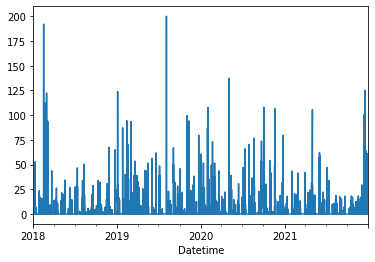

In [ ]:
df_agg_filtered.value.plot.line()

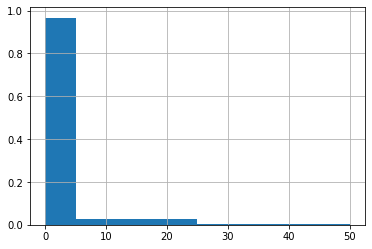

In [ ]:
import numpy as np
n_observations = df_agg_filtered.shape[0]
df_agg_filtered.value.hist(bins=[0, 5, 25, 50], weights=np.ones(n_observations) / n_observations)

# Geração das séries agregadas e filtradas

Esta seção usa a função `aggregate_time_series` para gerar séries agregadas e filtradas para todas as estações pluviométricas.

<h2 align="center"><font color="#FF8B00">&#8779; &#8779; &#8779;</font></h2>

In [ ]:
!cd estacoes_plv

/bin/bash: line 0: cd: content: No such file or directory


In [ ]:
!ls

estacoes_plv  estacoes_plv.zip	sample_data  tijuca_2018_2021_1H.csv


In [ ]:
import glob, os

out_dir = '/content/agg_2018_2021'

for in_filename in glob.glob("*.csv"):
    head, tail = os.path.split(in_filename)
    filename_w_ext = os.path.basename(in_filename)
    filename, file_extension = os.path.splitext(filename_w_ext)
    out_filename = os.path.join(out_dir, filename + '_2018_2021' + file_extension)

    if os.path.exists(out_filename):
      continue

    print(in_filename + ' --> ' + out_filename) 

    df_agg_filtered = aggregate_time_series(in_filename = in_filename,
                                            temporal_res = '1H', 
                          start_timestamp = "2018-01-01 00:00:00",
                            end_timestamp = "2021-12-31 21:00:00")    
    df_agg_filtered.to_csv(out_filename)

bangu.csv --> /content/agg_2018_2021/bangu_2018_2021.csv
madureira.csv --> /content/agg_2018_2021/madureira_2018_2021.csv
piedade.csv --> /content/agg_2018_2021/piedade_2018_2021.csv
tijuca_muda.csv --> /content/agg_2018_2021/tijuca_muda_2018_2021.csv
urca.csv --> /content/agg_2018_2021/urca_2018_2021.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DtypeWarning: Columns (3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.


tijuca.csv --> /content/agg_2018_2021/tijuca_2018_2021.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DtypeWarning: Columns (2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.


anchieta.csv --> /content/agg_2018_2021/anchieta_2018_2021.csv
santa_teresa.csv --> /content/agg_2018_2021/santa_teresa_2018_2021.csv
barrinha.csv --> /content/agg_2018_2021/barrinha_2018_2021.csv
copacabana.csv --> /content/agg_2018_2021/copacabana_2018_2021.csv
alto_da_boa_vista.csv --> /content/agg_2018_2021/alto_da_boa_vista_2018_2021.csv
grajau.csv --> /content/agg_2018_2021/grajau_2018_2021.csv
ilha_do_governador.csv --> /content/agg_2018_2021/ilha_do_governador_2018_2021.csv
sepetiba.csv --> /content/agg_2018_2021/sepetiba_2018_2021.csv
tanque.csv --> /content/agg_2018_2021/tanque_2018_2021.csv
iraja.csv --> /content/agg_2018_2021/iraja_2018_2021.csv
recreio.csv --> /content/agg_2018_2021/recreio_2018_2021.csv
saude.csv --> /content/agg_2018_2021/saude_2018_2021.csv
av_brasil_mendanha.csv --> /content/agg_2018_2021/av_brasil_mendanha_2018_2021.csv
laranjeiras.csv --> /content/agg_2018_2021/laranjeiras_2018_2021.csv
santa_cruz.csv --> /content/agg_2018_2021/santa_cruz_2018_2021.c

O bloco de código a seguir cria um arquivo compactado com todas as séries resultantes da célula de código acima.

In [ ]:
!zip -r /content/agg_2018_2021_3H.zip /content/agg_2018_2021

  adding: content/agg_2018_2021/ (stored 0%)
  adding: content/agg_2018_2021/riocentro_2018_2021.csv (deflated 88%)
  adding: content/agg_2018_2021/campo_grande_2018_2021.csv (deflated 88%)
  adding: content/agg_2018_2021/sao_cristovao_2018_2021.csv (deflated 88%)
  adding: content/agg_2018_2021/laranjeiras_2018_2021.csv (deflated 88%)
  adding: content/agg_2018_2021/av_brasil_mendanha_2018_2021.csv (deflated 88%)
  adding: content/agg_2018_2021/santa_teresa_2018_2021.csv (deflated 87%)
  adding: content/agg_2018_2021/anchieta_2018_2021.csv (deflated 88%)
  adding: content/agg_2018_2021/grajau_jacarepagua_2018_2021.csv (deflated 88%)
  adding: content/agg_2018_2021/grota_funda_2018_2021.csv (deflated 87%)
  adding: content/agg_2018_2021/sepetiba_2018_2021.csv (deflated 88%)
  adding: content/agg_2018_2021/ilha_do_governador_2018_2021.csv (deflated 88%)
  adding: content/agg_2018_2021/rocinha_2018_2021.csv (deflated 87%)
  adding: content/agg_2018_2021/iraja_2018_2021.csv (deflated 88%)

# Agregação de todas as estações

Créditos: essa seção foi implementada pelo Claudio Daniel, para produzir um tabela com as percentagens de precipitação por nível de severidade. Os [níveis de severidade](http://alertario.rio.rj.gov.br/previsao-do-tempo/termosmet/) utilizados foram os definidos pelo AlertaRio:

- **Chuva fraca**.	Precipitação cuja intensidade é menor do que 5,0 mm/h.
- **Chuva moderada**.	Precipitação cuja intensidade está compreendida entre 5,0 e 25 mm/h.
- **Chuva forte**.	Precipitação cuja intensidade está compreendida entre 25,1 e 50 mm/h.
- **Chuva muito forte**.	Precipitação cuja intensidade é maior do que 50,0 mm/h.

In [ ]:
import os

estacoes_lst = os.listdir('estacoes_plv/')

In [ ]:
df_lst_agg_filtered = [aggregate_time_series(in_filename = 'estacoes_plv/'+estacao,
                      temporal_res = '1H', 
                      start_timestamp = "2018-01-01 00:00:00",
                      end_timestamp = "2021-12-31 21:00:00")
                      for estacao in estacoes_lst]

Reading from estacoes_plv/av_brasil_mendanha.csv
Reading from estacoes_plv/jardim_botanico.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  """


Reading from estacoes_plv/alto_da_boa_vista.csv
Reading from estacoes_plv/gericino.csv
Reading from estacoes_plv/penha.csv
Reading from estacoes_plv/barrinha.csv
Reading from estacoes_plv/sepetiba.csv
Reading from estacoes_plv/guaratiba.csv
Reading from estacoes_plv/urca.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  """


Reading from estacoes_plv/grajau_jacarepagua.csv
Reading from estacoes_plv/santa_cruz.csv
Reading from estacoes_plv/itanhanga.csv
Reading from estacoes_plv/grajau.csv
Reading from estacoes_plv/riocentro.csv
Reading from estacoes_plv/laranjeiras.csv
Reading from estacoes_plv/rocinha.csv
Reading from estacoes_plv/grande_meier.csv
Reading from estacoes_plv/tijuca_muda.csv
Reading from estacoes_plv/grota_funda.csv
Reading from estacoes_plv/tijuca.csv
Reading from estacoes_plv/vidigal.csv
Reading from estacoes_plv/campo_grande.csv
Reading from estacoes_plv/iraja.csv
Reading from estacoes_plv/test.csv
Reading from estacoes_plv/recreio.csv
Reading from estacoes_plv/anchieta.csv
Reading from estacoes_plv/tanque.csv
Dropping first row and trying again.
Reading from estacoes_plv/sao_cristovao.csv
Reading from estacoes_plv/santa_teresa.csv
Reading from estacoes_plv/cidade_de_deus.csv
Reading from estacoes_plv/ilha_do_governador.csv
Reading from estacoes_plv/saude.csv
Reading from estacoes_plv/men

In [ ]:
df_all_agg_filtered = pd.concat(df_lst_agg_filtered)

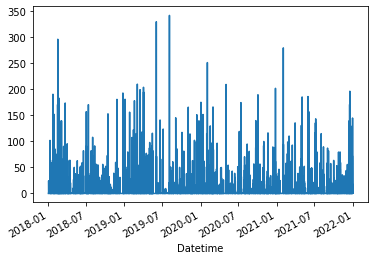

In [ ]:
df_all_agg_filtered.value.plot.line()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_observations = df_all_agg_filtered.shape[0]
hst = np.histogram(df_all_agg_filtered.value, bins=[0, 5, 25, 50, 5000], weights=np.ones(n_observations) / n_observations)

In [ ]:
hst[0]

array([0.97309378, 0.02187537, 0.00332473, 0.00170612])

# Geração das séries sobre a grade

N.B.: code in this section needs geopandas installed.

In [3]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Polygon, Point

In [5]:
import folium
import branca
import branca.colormap as cm

m = folium.Map([-22.925778948753702, -43.489029909370046], zoom_start=10, tiles='cartodbpositron')

colormap = ['magenta', 'red', 'orange', 'yellow']

#folium.GeoJson(polygon).add_to(m)
folium.LatLngPopup().add_to(m)

In [ ]:
lat_list = [-23.1339033365138, 
             -23.0647349667651, 
             -22.9955665970164, 
             -22.9263982272677, 
             -22.857229857519, 
             -22.7880614877703, 
             -22.7188931180216, -22.649724748272934]
lon_list = [-43.8906028271505, 
              -43.7697438637654, 
              -43.6488849003802,
              -43.5280259369951, 
              -43.4071669736099,
              -43.2863080102248,
              -43.1654490468397, -43.04835145732227]
              
grid_cells = {}

cell_idx = 1
for j, _ in enumerate(lon_list):
  if j + 1 == len(lon_list):
    break
  for i, _ in enumerate(lat_list):
    if i + 1 == len(lat_list):
      break

    lon_ul, lat_ul = lon_list[j], lat_list[i]
    lon_ur, lat_ur = lon_list[j+1], lat_list[i]
    lon_lr, lat_lr = lon_list[j+1], lat_list[i+1]
    lon_ll, lat_ll = lon_list[j], lat_list[i+1]

    ul = (lon_ul, lat_ul)
    ur = (lon_ur, lat_ur)
    lr = (lon_lr, lat_lr)
    ll = (lon_ll, lat_ll)

    polygon_geom = Polygon([ul, ur, lr, ll])
    grid_cells[cell_idx] = polygon_geom
    cell_idx += 1

    crs = {'init': 'epsg:4326'}
    polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])    
    folium.GeoJson(polygon).add_to(m)

assert(49==len(grid_cells))

m

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axi

**IMPORTANTE**: cada uma das 49 células do grid está assocada a um número na faixa de 1 até 49. As células estão posicionadas de tal forma que a célula 1 é a do canto inferior esquerdo, e a célula 49 é a do canto superior direito.

In [ ]:
import pandas as pd

df_estacoes = pd.read_csv('estacoes_pluviometricas.csv')


#df_estacoes = df_estacoes.drop(columns=['Unnamed: 0'])
#df_estacoes['ColumnName'] = df['ColumnName'].convert_objects(convert_numeric=True)

df_estacoes_pluviometricas = df_estacoes[~df_estacoes['N'].isin([1,11,16,19,20,22,28,32])]
df_estacoes_meteorologicas = df_estacoes[df_estacoes['N'].isin([1,11,16,19,20,22,28,32])]
df_estacoes.head()


,N,Estação,Latitude,Longitude,Cota (m),X,Y
0,1,Vidigal,-22.9925,-43.2331,85.0,"681,138,532","7,456,241,298"
1,2,Urca,-22.9558,-43.1667,90.0,"688,004,213","7,460,236,157"
2,3,Rocinha,-22.9858,-43.2450,160.0,"679,831,802","7,457,041,035"
3,4,Tijuca,-22.9319,-43.2217,340.0,"682,358,108","7,462,941,416"
4,5,Santa Teresa,-22.9317,-43.1964,170.0,"684,951,792","7,462,971,838"


In [ ]:
import pandas as pd

#Novo data set
dfnew = pd.read_json('https://apitempo.inmet.gov.br/estacoes/T')
dfnewrj = dfnew[dfnew['SG_ESTADO'] == 'RJ']

dfnewrj.head()

,CD_OSCAR,DC_NOME,FL_CAPITAL,DT_FIM_OPERACAO,CD_SITUACAO,TP_ESTACAO,VL_LATITUDE,CD_WSI,CD_DISTRITO,VL_ALTITUDE,SG_ESTADO,SG_ENTIDADE,CD_ESTACAO,VL_LONGITUDE,DT_INICIO_OPERACAO
23,None,ANGRA DOS REIS,N,NaN,Operante,Automatica,-22.975556,0-76-0-3300100000000555,6,6.0,RJ,INMET,A628,-44.303333,2017-08-24T21:00:00.000-03:00
42,0-2000-0-86892,ARRAIAL DO CABO,N,NaN,Operante,Automatica,-22.975278,0-76-0-3300258000000108,6,5.0,RJ,INMET,A606,-42.021389,2006-09-21T21:00:00.000-03:00
104,0-2000-0-86854,CAMBUCI,N,NaN,Operante,Automatica,-21.587500,0-76-0-3300902000000025,6,46.0,RJ,INMET,A604,-41.958333,2002-11-19T22:00:00.000-02:00
115,0-2000-0-86855,CAMPOS DOS GOYTACAZES,N,NaN,Operante,Automatica,-21.714722,0-76-0-3301009000000109,6,17.0,RJ,INMET,A607,-41.343889,2006-09-24T21:00:00.000-03:00
116,0-2000-0-86890,CAMPOS DOS GOYTACAZES - SAO TOME,N,NaN,Operante,Automatica,-22.041667,0-76-0-3301009000000382,6,7.0,RJ,INMET,A620,-41.051667,2008-06-12T21:00:00.000-03:00


In [ ]:
lista = dfnewrj['CD_ESTACAO'].tolist()
lista = lista[1:]
lista2 = list(range(16,21))

dfnew2 = pd.read_json('https://apitempo.inmet.gov.br/estacao/2015-01-01/2016-01-01/A628')
for j in lista2:
  for i in lista :
    novo = pd.read_json('https://apitempo.inmet.gov.br/estacao/20'+ str(j) +'-01-01/20'+ str(j+1) +'-01-01/' + i)
    uniao = [dfnew2, novo]
    dfnew2 = pd.concat(uniao)

dfnew2.to_csv('teste.csv')

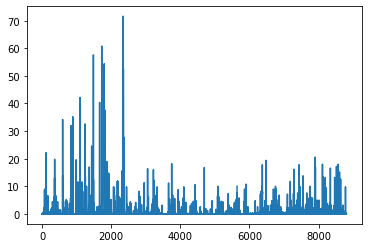

In [ ]:
df = dfnew2[dfnew2['DC_NOME'] == 'RIO DE JANEIRO - FORTE DE COPACABANA']

df['CHUVA'].plot.line()

In [ ]:
dfnew2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107984 entries, 0 to 8807
Data columns (total 27 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   DC_NOME       1107984 non-null  object 
 1   PRE_INS       944635 non-null   float64
 2   TEM_SEN       895656 non-null   float64
 3   VL_LATITUDE   1107984 non-null  float64
 4   PRE_MAX       943788 non-null   float64
 5   UF            1107984 non-null  object 
 6   RAD_GLO       930825 non-null   float64
 7   PTO_INS       925649 non-null   float64
 8   TEM_MIN       954837 non-null   float64
 9   VL_LONGITUDE  1107984 non-null  float64
 10  UMD_MIN       925195 non-null   float64
 11  PTO_MAX       923958 non-null   float64
 12  VEN_DIR       923622 non-null   float64
 13  DT_MEDICAO    1107984 non-null  object 
 14  CHUVA         942509 non-null   float64
 15  PRE_MIN       943776 non-null   float64
 16  UMD_MAX       925415 non-null   float64
 17  VEN_VEL       923613 non-null 

In [ ]:
lat = list(df_estacoes_pluviometricas.Latitude)
lon = list(df_estacoes_pluviometricas.Longitude)

for loc in zip(lat, lon):
    folium.Circle(
        location=loc,
        radius=10,
        fill=True,
        color='red',
        fill_opacity=0.7
    ).add_to(m)

lat = list(df_estacoes_meteorologicas.Latitude)
lon = list(df_estacoes_meteorologicas.Longitude)

for loc in zip(lat, lon):
    folium.Circle(
        location=loc,
        radius=10,
        fill=True,
        color='green',
        fill_opacity=0.7
    ).add_to(m)

lat = list(dfnewrj.VL_LATITUDE)
lon = list(dfnewrj.VL_LONGITUDE)

for loc in zip(lat, lon):
    folium.Circle(
        location=loc,
        radius=10,
        fill=True,
        color='purple',
        fill_opacity=0.7
    ).add_to(m)


m

Pegando as estações na nossa área de interesse

In [ ]:
lat = [-22.9268,-22.9951]
log = [-43.2868,-43.1649]

df_estacoes_area = df_estacoes[df_estacoes['Latitude'].between(lat[1],lat[0])]
df_estacoes_area = df_estacoes_area[df_estacoes_area['Longitude'].between(log[0],log[1])]
df_estacoes_area['Estação']

0               Vidigal
1                  Urca
2               Rocinha
3                Tijuca
4          Santa Teresa
5            Copacabana
15      Jardim Botânico
27    Alto da Boa Vista
30          Laranjeiras
32          Tijuca/Muda
Name: Estação, dtype: object

In [ ]:
from numpy import array
import torch
import gc
import torch.nn as nn
from tqdm import tqdm_notebook as tqdm
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import requests, zipfile, io
import matplotlib.pyplot as plt
import os

'''
df_janela = pd.read_csv('Inmet_dados.csv')

df_janela.head()

df_janelaCopacabana = df_janela[df_janela['CD_ESTACAO'] == 'A652']

df_janelaCopacabana.head()
'''

"\ndf_janela = pd.read_csv('Inmet_dados.csv')\n\ndf_janela.head()\n\ndf_janelaCopacabana = df_janela[df_janela['CD_ESTACAO'] == 'A652']\n\ndf_janelaCopacabana.head()\n"

# Janela Deslizante
Teste para gerar janela dislizante do data set

In [ ]:
def window_generator(sequence, n_steps):
    x, y = list(), list()
    for i in range(len(sequence)):
        
        end_ix = i + n_steps
        
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return array(x), array(y)

**DADOS DA ESTAÇÃO**

ESTAÇÃO: FORTE DE COPACABANA

UF: RJ

REGIÃO:SE

CODIGO (WMO): A652

LATITUDE / LONGITUDE: (-22,98833333 , -43,19027777)

ALTITUDE: 42

DATA DE FUNDAÇÃO:2007-05-18




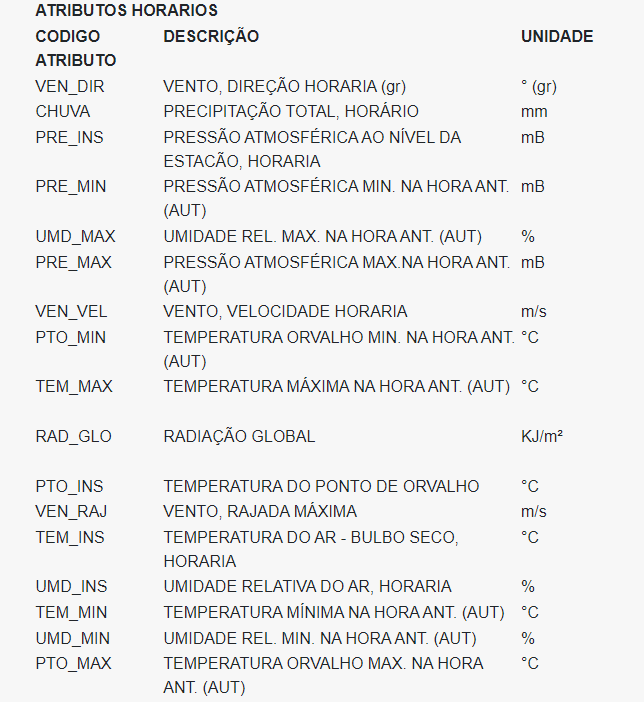

Janela Deslizante - Copacabana

In [ ]:
janela_chuva_copa = df_janelaCopacabana['CHUVA'].to_numpy()

seq_train_x, seq_train_y  = window_generator(janela_chuva_copa, 12)

df_toy = pd.DataFrame(seq_train_x)
df_toy.columns =['t_12', 't_11', 't_10','t_9', 't_8', 't_7','t_6', 't_5', 't_4','t_3', 't_2', 't_1']
df_toy['target'] = seq_train_y.tolist()

df_toy.head(50)

,t_12,t_11,t_10,t_9,t_8,t_7,t_6,t_5,t_4,t_3,t_2,t_1,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_janela2 = pd.read_csv('agg_2018_2021/urca_2018_2021.csv')
df_janela2.head()

,Datetime,value
0,2018-01-01 00:00:00,0.0
1,2018-01-01 01:00:00,0.0
2,2018-01-01 02:00:00,0.0
3,2018-01-01 03:00:00,0.0
4,2018-01-01 04:00:00,0.0


Como saber em que célula do grid cada estação está localizada:

# Novo mapa - por região

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 29.2 MB/s 
     |████████████████████████████████| 6.3 MB 43.7 MB/s 
     |████████████████████████████████| 16.7 MB 483 kB/s 


In [6]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Polygon, Point
import pandas as pd
import folium
import branca
import branca.colormap as cm

rj = gpd.read_file('Zonas_Pluviometricas.shp')
'''
norte = ["Alto da Boa Vista", "Andaraí", "Grajaú", "Maracanã", "Praça da Bandeira", "Tijuca", "Vila Isabel", "Abolição", "Água Santa", "Cachambi", "Del Castilho", "Encantado", "Engenho de Dentro", "Engenho Novo", "Higienópolis", "Jacaré", "Jacarezinho", "Lins de Vasconcelos", "Manguinhos", "Maria da Graça", "Méier", "Piedade", "Pilares", "Riachuelo", "Rocha", "Sampaio", "São Francisco Xavier", "Todos os Santos", "Bonsucesso", "Bancários", "Cacuia", "Cidade Universitária", "Cocotá", "Freguesia (Ilha)", "Galeão", "Jardim Carioca", "Jardim Guanabara", "Maré", "Moneró", "Olaria", "Pitangueiras", "Portuguesa", "Praia da Bandeira", "Ramos", "Ribeira", "Tauá", "Zumbi", "Acari", "Anchieta", "Barros Filho", "Bento Ribeiro", "Brás de Pina", "Campinho", "Cavalcanti", "Cascadura", "Coelho Neto", "Colégio", "Complexo do Alemão", "Cordovil", "Costa Barros", "Engenheiro Leal", "Engenho da Rainha", "Guadalupe", "Honório Gurgel", "Inhaúma", "Irajá", "Jardim América", "Madureira", "Marechal Hermes", "Osvaldo Cruz","Turiaçú" , "Parada de Lucas", "Parque Anchieta", "Parque Colúmbia", "Pavuna", "Penha", "Penha Circular", "Quintino Bocaiúva", "Ricardo de Albuquerque", "Rocha Miranda", "Tomás Coelho", "Turiaçu", "Vaz Lobo", "Vicente de Carvalho", "Vigário Geral", "Vila da Penha", "Vila Kosmos", "Vista Alegre"]
sul = ['Botafogo','Catete','Copacabana','Cosme Velho','Flamengo','Gávea','Glória','Humaitá','Ipanema','Jardim Botânico','Lagoa','Laranjeiras','Leblon','Leme','São Conrado','Urca','Vidigal','Rocinha']
oeste = ["Anil", "Barra da Tijuca", "Camorim", "Cidade de Deus", "Curicica", "Freguesia (Jacarepaguá)", "Gardênia Azul", "Grumari", "Itanhangá", "Jacarepaguá", "Joá", "Praça Seca", "Pechincha", "Rio das Pedras", "Recreio dos Bandeirantes", "Tanque", "Taquara", "Vargem Grande", "Vargem Pequena", "Vila Valqueire", "Jardim Sulacap", "Bangu", "Campo dos Afonsos", "Deodoro", "Gericinó", "Jabour", "Magalhães Bastos", "Padre Miguel", "Realengo", "Santíssimo", "Senador Camará", "Vila Kennedy", "Vila Militar", "Barra de Guaratiba", "Campo Grande", "Cosmos", "Ilha de Guaratiba","Guaratiba", "Inhoaíba", "Paciência", "Pedra de Guaratiba", "Santa Cruz", "Senador Vasconcelos", "Sepetiba"]
centro = ["São Cristóvão", "Benfica", "Caju", "Catumbi", "Centro", "Cidade Nova", "Estácio", "Gamboa", "Lapa", "Mangueira", "Paquetá", "Rio Comprido", "Santa Teresa", "Santo Cristo", "Saúde", "Vasco da Gama"]

tudo = norte + sul + oeste + centro

rjsul = rj[rj['NOME'].isin(sul)]
rjnorte = rj[rj['NOME'].isin(norte)]
rjoeste = rj[rj['NOME'].isin(oeste)]
rjcentro = rj[rj['NOME'].isin(centro)]

rjn = rj[~rj['NOME'].isin(tudo)]

m = folium.Map([-22.925778948753702, -43.489029909370046], zoom_start=10, tiles='cartodbpositron')

colormap = ['magenta', 'red', 'orange', 'yellow']

bordersStyleN={'color': '#7eaabf','weight': 2, 'fillColor': '#7eaabf','fillOpacity': 0.2}
bordersStyleS={'color': '#70cefa','weight': 2, 'fillColor': '#70cefa','fillOpacity': 0.2}
bordersStyleO={'color': '#1e6e94','weight': 2, 'fillColor': '#1e6e94','fillOpacity': 0.2}
bordersStyleC={'color': '#03aeff','weight': 2, 'fillColor': '#03aeff','fillOpacity': 0.2}

folium.GeoJson(rjsul,style_function=lambda x:bordersStyleS).add_to(m)
folium.GeoJson(rjnorte,style_function=lambda x:bordersStyleN).add_to(m)
folium.GeoJson(rjoeste,style_function=lambda x:bordersStyleO).add_to(m)
folium.GeoJson(rjcentro,style_function=lambda x:bordersStyleC).add_to(m)
'''

folium.GeoJson(rj).add_to(m)

folium.LatLngPopup().add_to(m)


m

In [ ]:
df_estacoes = pd.read_csv('estacoes_pluviometricas.csv')

#Estações COR
df_estacoes_pluviometricas = df_estacoes[~df_estacoes['N'].isin([1,11,16,19,20,22,28,32])]
df_estacoes_meteorologicas = df_estacoes[df_estacoes['N'].isin([1,11,16,19,20,22,28,32])]
#Divisão por Zona
df_estacoes_sul = df_estacoes[df_estacoes['N'].isin([1,2,3,6,16,31])]
df_estacoes_norte = df_estacoes[df_estacoes['N'].isin([4,7,9,10,11,13,23,28,33,24,8])]
df_estacoes_centro = df_estacoes[df_estacoes['N'].isin([5,15,32])]
df_estacoes_oeste = df_estacoes[df_estacoes['N'].isin([12,14,17,18,19,20,21,22,25,26,27,29,30])]


#Estações INMET
dfnew = pd.read_json('https://apitempo.inmet.gov.br/estacoes/T')
dfnewrj = dfnew[dfnew['SG_ESTADO'] == 'RJ']

inmet_oeste = ['A636','A621','A602']
inmet_sul = ['A652']

lat = list(df_estacoes_pluviometricas.Latitude)
lon = list(df_estacoes_pluviometricas.Longitude)

for loc in zip(lat, lon):
    folium.Circle(
        location=loc,
        radius=20,
        fill=True,
        color='red',
        fill_opacity=0.7
    ).add_to(m)

lat = list(df_estacoes_meteorologicas.Latitude)
lon = list(df_estacoes_meteorologicas.Longitude)

for loc in zip(lat, lon):
    folium.Circle(
        location=loc,
        radius=20,
        fill=True,
        color='green',
        fill_opacity=0.7
    ).add_to(m)

lat = list(dfnewrj.VL_LATITUDE)
lon = list(dfnewrj.VL_LONGITUDE)

for loc in zip(lat, lon):
    folium.Circle(
        location=loc,
        radius=20,
        fill=True,
        color='purple',
        fill_opacity=0.7
    ).add_to(m)

m

In [ ]:
df_estacoes_santa_t = pd.read_csv('santa_teresa_2018_2021.csv')
df_estacoes_saude = pd.read_csv('saude_2018_2021.csv')
df_estacoes_sao_cristovao = pd.read_csv('sao_cristovao_2018_2021.csv')

df_cell = pd.DataFrame()
df_cell['santa_teresa'] = df_estacoes_santa_t.value
df_cell['saude'] = df_estacoes_saude.value
df_cell['sao_cristovao'] = df_estacoes_sao_cristovao.value
df_cell['average'] = df_cell.mean(axis=1)

df_cell

,santa_teresa,saude,sao_cristovao,average
0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.000000
...,...,...,...,...
35057,0.6,0.0,0.2,0.266667
35058,0.6,0.0,0.0,0.200000
35059,0.0,0.0,0.0,0.000000
35060,0.2,0.6,0.2,0.333333


In [ ]:
janela_centro = df_cell['average'].to_numpy()

seq_train_x, seq_train_y  = window_generator(janela_centro, 12)

df_janela_centro = pd.DataFrame(seq_train_x)
df_janela_centro.columns =['t_12', 't_11', 't_10','t_9', 't_8', 't_7','t_6', 't_5', 't_4','t_3', 't_2', 't_1']
df_janela_centro['target'] = seq_train_y.tolist()

df_janela_centro

,t_12,t_11,t_10,t_9,t_8,t_7,t_6,t_5,t_4,t_3,t_2,t_1,target
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35045,0.066667,0.533333,1.466667,0.533333,1.733333,0.600000,1.200000,1.333333,0.600000,0.000000,0.133333,0.466667,0.266667
35046,0.533333,1.466667,0.533333,1.733333,0.600000,1.200000,1.333333,0.600000,0.000000,0.133333,0.466667,0.266667,0.200000
35047,1.466667,0.533333,1.733333,0.600000,1.200000,1.333333,0.600000,0.000000,0.133333,0.466667,0.266667,0.200000,0.000000
35048,0.533333,1.733333,0.600000,1.200000,1.333333,0.600000,0.000000,0.133333,0.466667,0.266667,0.200000,0.000000,0.333333


In [ ]:
df_estacoes_sul.head(10)

df_estacoes_vidigal = pd.read_csv('vidigal_2018_2021.csv')
df_estacoes_urca = pd.read_csv('urca_2018_2021.csv')
df_estacoes_rocinha = pd.read_csv('rocinha_2018_2021.csv')
df_estacoes_copacabana = pd.read_csv('copacabana_2018_2021.csv')
df_estacoes_jardim_botanico = pd.read_csv('jardim_botanico_2018_2021.csv')
df_estacoes_laranjeira = pd.read_csv('laranjeiras_2018_2021.csv')

df_cell = pd.DataFrame()
df_cell['vidigal'] = df_estacoes_vidigal.value
df_cell['urca'] = df_estacoes_urca.value
df_cell['rocinha'] = df_estacoes_rocinha.value
df_cell['copacabana'] = df_estacoes_copacabana.value
df_cell['jardim_botanico'] = df_estacoes_jardim_botanico.value
df_cell['laranjeira'] = df_estacoes_laranjeira.value
df_cell['average'] = df_cell.mean(axis=1)

df_cell

,vidigal,urca,rocinha,copacabana,jardim_botanico,laranjeira,average
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
35057,0.4,0.4,0.8,0.0,0.2,0.2,0.333333
35058,0.0,0.4,0.2,0.8,0.8,0.8,0.500000
35059,0.0,0.0,0.2,0.0,0.0,0.0,0.033333
35060,0.0,0.0,0.8,0.0,0.0,0.2,0.166667


In [ ]:
janela_sul = df_cell['average'].to_numpy()

seq_train_x, seq_train_y  = window_generator(janela_sul, 12)

df_janela_sul = pd.DataFrame(seq_train_x)
df_janela_sul.columns =['t_12', 't_11', 't_10','t_9', 't_8', 't_7','t_6', 't_5', 't_4','t_3', 't_2', 't_1']
df_janela_sul['target'] = seq_train_y.tolist()

df_janela_sul

,t_12,t_11,t_10,t_9,t_8,t_7,t_6,t_5,t_4,t_3,t_2,t_1,target
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35045,0.066667,0.233333,0.766667,0.533333,0.733333,0.600000,0.233333,1.033333,0.733333,0.000000,0.466667,0.833333,0.333333
35046,0.233333,0.766667,0.533333,0.733333,0.600000,0.233333,1.033333,0.733333,0.000000,0.466667,0.833333,0.333333,0.500000
35047,0.766667,0.533333,0.733333,0.600000,0.233333,1.033333,0.733333,0.000000,0.466667,0.833333,0.333333,0.500000,0.033333
35048,0.533333,0.733333,0.600000,0.233333,1.033333,0.733333,0.000000,0.466667,0.833333,0.333333,0.500000,0.033333,0.166667


**Plot de direção do vento**

In [12]:
!pip install metpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install iris
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.2
Uninstalling matplotlib-3.5.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 20.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are 

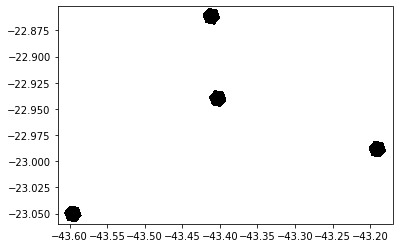

In [26]:
import matplotlib.pyplot as plt
import numpy as np

import cartopy
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import metpy.calc
from metpy.units import units

'''
import iris
import iris.coord_categorisation
import iris.quickplot as qplt
'''
df_teste = pd.read_csv('vento_INMET.csv')

u,v =  metpy.calc.wind_components(df_teste['VEN_VEL'].iloc[1] * units("m/s"), df_teste['VEN_DIR'].iloc[1] * units.deg)

x = df_teste['VL_LONGITUDE']
y = df_teste['VL_LATITUDE']

ulon = x

#transform = m.coord_system.as_cartopy_projection()
widths = np.linspace(0, 2, x.size)
#plt.quiver(X, Y, cos(deg), sin(deg), linewidths=widths)
plt.quiver(x, y, u, v,width=0.05)

corte


Como computar a série média a partir de duas séries:

In [ ]:
df_vidigal = pd.read_csv('vidigal_2018_2021.csv')
df_urca = pd.read_csv('urca_2018_2021.csv')

df_cell = pd.DataFrame()
df_cell['urca'] = df_urca.value
df_cell['vidigal'] = df_vidigal.value
df_cell['average'] = df_cell.mean(axis=1)

In [ ]:
df_cell.tail()

,urca,vidigal,average
11683,2.2,0.0,1.1
11684,1.8,0.8,1.3
11685,2.0,1.6,1.8
11686,0.4,0.0,0.2
11687,0.8,0.0,0.4


# Área temporária
<h2 align="center"><font color="#FF8B00">&#8779; &#8779; &#8779;</font></h2>

In [ ]:
import geopandas as gpd

gdf_distances = gpd.GeoDataFrame(
    df_estacoes,
    geometry=gpd.points_from_xy(df_estacoes['Latitude'],
                                df_estacoes['Longitude'],
                                crs='EPSG:4674'),
    crs='EPSG:4674')
gdf_distances.set_index('Estação', inplace=True)
gdf_distances.head(33)

,N,Latitude,Longitude,Cota (m),X,Y,geometry
Estação,,,,,,,
Vidigal,1,-22.99250,-43.23306,85,"681138,532","7456241,298",POINT (-22.99250 -43.23306)
Urca,2,-22.95583,-43.16667,90,"688004,213","7460236,157",POINT (-22.95583 -43.16667)
Rocinha,3,-22.98583,-43.24500,160,"679831,802","7457041,035",POINT (-22.98583 -43.24500)
Tijuca,4,-22.93194,-43.22167,340,"682358,108","7462941,416",POINT (-22.93194 -43.22167)
Santa Teresa,5,-22.93167,-43.19639,170,"684951,792","7462971,838",POINT (-22.93167 -43.19639)
Copacabana,6,-22.98639,-43.18944,90,"685675,03","7456902,449",POINT (-22.98639 -43.18944)
Grajaú,7,-22.92222,-43.26750,80,"677639,269","7463809,403",POINT (-22.92222 -43.26750)
Ilha do Governador,8,-22.81806,-43.21028,0,"683708,659","7475959,609",POINT (-22.81806 -43.21028)
Penha,9,-22.84444,-43.27528,111,"677059,917","7472757,104",POINT (-22.84444 -43.27528)


In [ ]:
df_estacoes.to_csv('estacoes_pluviometricas.csv')

In [ ]:
import chardet
import pandas as pd

with open('nomes_estacoes.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

df_nomes_estacoes = pd.read_csv('nomes_estacoes.csv', encoding=result['encoding'])
df_nomes_estacoes.head(33)

,Nome,Arquivo
0,Vidigal,vidigal
1,Urca,urca
2,Rocinha,rocinha
3,Tijuca,tijuca
4,Santa Teresa,santa_teresa
5,Copacabana,copacabana
6,Grajaú,grajau
7,Ilha do Governador,ilha_do_governador
8,Penha,penha
9,Madureira,madureira


In [ ]:
df_estacoes['Arquivo'] = df_nomes_estacoes.Arquivo
df_estacoes.head(33)

,N,Estação,Latitude,Longitude,Cota (m),X,Y,geometry,Arquivo
0,1,Vidigal,-22.99250,-43.23306,85,"681138,532","7456241,298",POINT (-22.99250 -43.23306),vidigal
1,2,Urca,-22.95583,-43.16667,90,"688004,213","7460236,157",POINT (-22.95583 -43.16667),urca
2,3,Rocinha,-22.98583,-43.24500,160,"679831,802","7457041,035",POINT (-22.98583 -43.24500),rocinha
3,4,Tijuca,-22.93194,-43.22167,340,"682358,108","7462941,416",POINT (-22.93194 -43.22167),tijuca
4,5,Santa Teresa,-22.93167,-43.19639,170,"684951,792","7462971,838",POINT (-22.93167 -43.19639),santa_teresa
5,6,Copacabana,-22.98639,-43.18944,90,"685675,03","7456902,449",POINT (-22.98639 -43.18944),copacabana
6,7,Grajaú,-22.92222,-43.26750,80,"677639,269","7463809,403",POINT (-22.92222 -43.26750),grajau
7,8,Ilha do Governador,-22.81806,-43.21028,0,"683708,659","7475959,609",POINT (-22.81806 -43.21028),ilha_do_governador
8,9,Penha,-22.84444,-43.27528,111,"677059,917","7472757,104",POINT (-22.84444 -43.27528),penha
9,10,Madureira,-22.87333,-43.33889,45,"670409,679","7469665,02",POINT (-22.87333 -43.33889),madureira


In [ ]:
from shapely import geometry

polygon = [(-1571236.8349707182, 8989180.222117377), 
           (1599362.9654156454, 8924317.946336618), 
           (-1653179.0745812152, 8922145.163675062), 
           (-1626237.6614402141, 8986445.107619021)]

Point_X = -1627875.474
Point_Y = 8955472.968

line = geometry.LineString(polygon)
point = geometry.Point(Point_X, Point_Y)
polygon = geometry.Polygon(line)

print(polygon.contains(point))

True


In [ ]:
import pandas as pd
df = pd.read_csv('estacoes_plv/tijuca.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Dia,Hora,15min,01h,04h,24h,96h
0,02/01/1997,01:00:20,ND,ND,ND,ND,ND
1,02/01/1997,01:15:20,0.0,ND,ND,ND,ND
2,02/01/1997,01:30:20,0.0,ND,ND,ND,ND
3,02/01/1997,01:45:20,0.0,ND,ND,ND,ND
4,02/01/1997,02:00:20,0.0,0.0,ND,ND,ND


In [ ]:
df["Datetime"] = df["Dia"] + " " + df["Hora"]
df.head()

,Dia,Hora,15min,01h,04h,24h,96h,Datetime
0,02/01/1997,01:00:20,ND,ND,ND,ND,ND,02/01/1997 01:00:20
1,02/01/1997,01:15:20,0.0,ND,ND,ND,ND,02/01/1997 01:15:20
2,02/01/1997,01:30:20,0.0,ND,ND,ND,ND,02/01/1997 01:30:20
3,02/01/1997,01:45:20,0.0,ND,ND,ND,ND,02/01/1997 01:45:20
4,02/01/1997,02:00:20,0.0,0.0,ND,ND,ND,02/01/1997 02:00:20


In [ ]:
df["Datetime"] = pd.to_datetime(df["Datetime"])

In [ ]:
df.head(20)

,Dia,Hora,15min,01h,04h,24h,96h,Datetime
0,02/01/1997,01:00:20,ND,ND,ND,ND,ND,1997-02-01 01:00:20
1,02/01/1997,01:15:20,0.0,ND,ND,ND,ND,1997-02-01 01:15:20
2,02/01/1997,01:30:20,0.0,ND,ND,ND,ND,1997-02-01 01:30:20
3,02/01/1997,01:45:20,0.0,ND,ND,ND,ND,1997-02-01 01:45:20
4,02/01/1997,02:00:20,0.0,0.0,ND,ND,ND,1997-02-01 02:00:20
5,02/01/1997,02:15:20,0.0,0.0,ND,ND,ND,1997-02-01 02:15:20
6,02/01/1997,02:30:20,0.0,0.0,ND,ND,ND,1997-02-01 02:30:20
7,02/01/1997,02:45:20,0.0,0.0,ND,ND,ND,1997-02-01 02:45:20
8,02/01/1997,03:00:20,0.0,0.0,ND,ND,ND,1997-02-01 03:00:20
9,02/01/1997,03:15:20,0.0,0.0,ND,ND,ND,1997-02-01 03:15:20


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,Dia,Hora,15min,01h,04h,24h,96h,Datetime
0,02/01/1997,01:00:20,ND,ND,ND,ND,ND,1997-02-01 01:00:20
1,02/01/1997,01:15:20,0.0,ND,ND,ND,ND,1997-02-01 01:15:20
2,02/01/1997,01:30:20,0.0,ND,ND,ND,ND,1997-02-01 01:30:20
3,02/01/1997,01:45:20,0.0,ND,ND,ND,ND,1997-02-01 01:45:20
4,02/01/1997,02:00:20,0.0,0.0,ND,ND,ND,1997-02-01 02:00:20


In [ ]:
df = df[df['01h'] != 'ND']

In [ ]:
df.head()

,01h,Datetime
4,0.0,1997-02-01 02:00:20
5,0.0,1997-02-01 02:15:20
6,0.0,1997-02-01 02:30:20
7,0.0,1997-02-01 02:45:20
8,0.0,1997-02-01 03:00:20


In [ ]:
df = df.drop(columns=["Dia", "Hora", "15min", "04h", "24h", "96h"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873577 entries, 4 to 876594
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   01h       873577 non-null  object        
 1   Datetime  873577 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 20.0+ MB


In [ ]:
df['value'] = pd.to_numeric(df['01h'])

In [ ]:
df.head()

,01h,Datetime,value
4,0.0,1997-02-01 02:00:20,0.0
5,0.0,1997-02-01 02:15:20,0.0
6,0.0,1997-02-01 02:30:20,0.0
7,0.0,1997-02-01 02:45:20,0.0
8,0.0,1997-02-01 03:00:20,0.0


In [ ]:
df = df.drop(columns=["01h"])

In [ ]:
df.head()

,Datetime,value
4,1997-02-01 02:00:20,0.0
5,1997-02-01 02:15:20,0.0
6,1997-02-01 02:30:20,0.0
7,1997-02-01 02:45:20,0.0
8,1997-02-01 03:00:20,0.0


In [ ]:
cols = ['Datetime', 'value']
df = df[cols]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873577 entries, 4 to 876594
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  873577 non-null  datetime64[ns]
 1   value     873577 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.0 MB


In [ ]:
df.shape

(873577, 2)

In [ ]:
df_temp = df.drop_duplicates(subset=['Datetime'])

In [ ]:
df_temp.shape

(873487, 2)

In [ ]:
df_agg = df_temp.set_index('Datetime').resample('3H').sum()

In [ ]:
df_agg.tail(20)

,value
Datetime,
2021-12-29 12:00:00,0.0
2021-12-29 15:00:00,0.0
2021-12-29 18:00:00,0.0
2021-12-29 21:00:00,38.4
2021-12-30 00:00:00,0.0
2021-12-30 03:00:00,0.8
2021-12-30 06:00:00,0.0
2021-12-30 09:00:00,0.0
2021-12-30 12:00:00,0.0


In [ ]:
a = "2018-01-01 00:00:00"
b = "2021-12-31 21:00:00"
df_agg_2018_2021 = df_agg[(df_agg.index.get_level_values(0) >= a) & (df_agg.index.get_level_values(0) <= b)]

In [ ]:
df_agg_2018_2021.head()

,value
Datetime,
2018-01-01 00:00:00,0.0
2018-01-01 03:00:00,0.0
2018-01-01 06:00:00,0.0
2018-01-01 09:00:00,0.0
2018-01-01 12:00:00,0.0


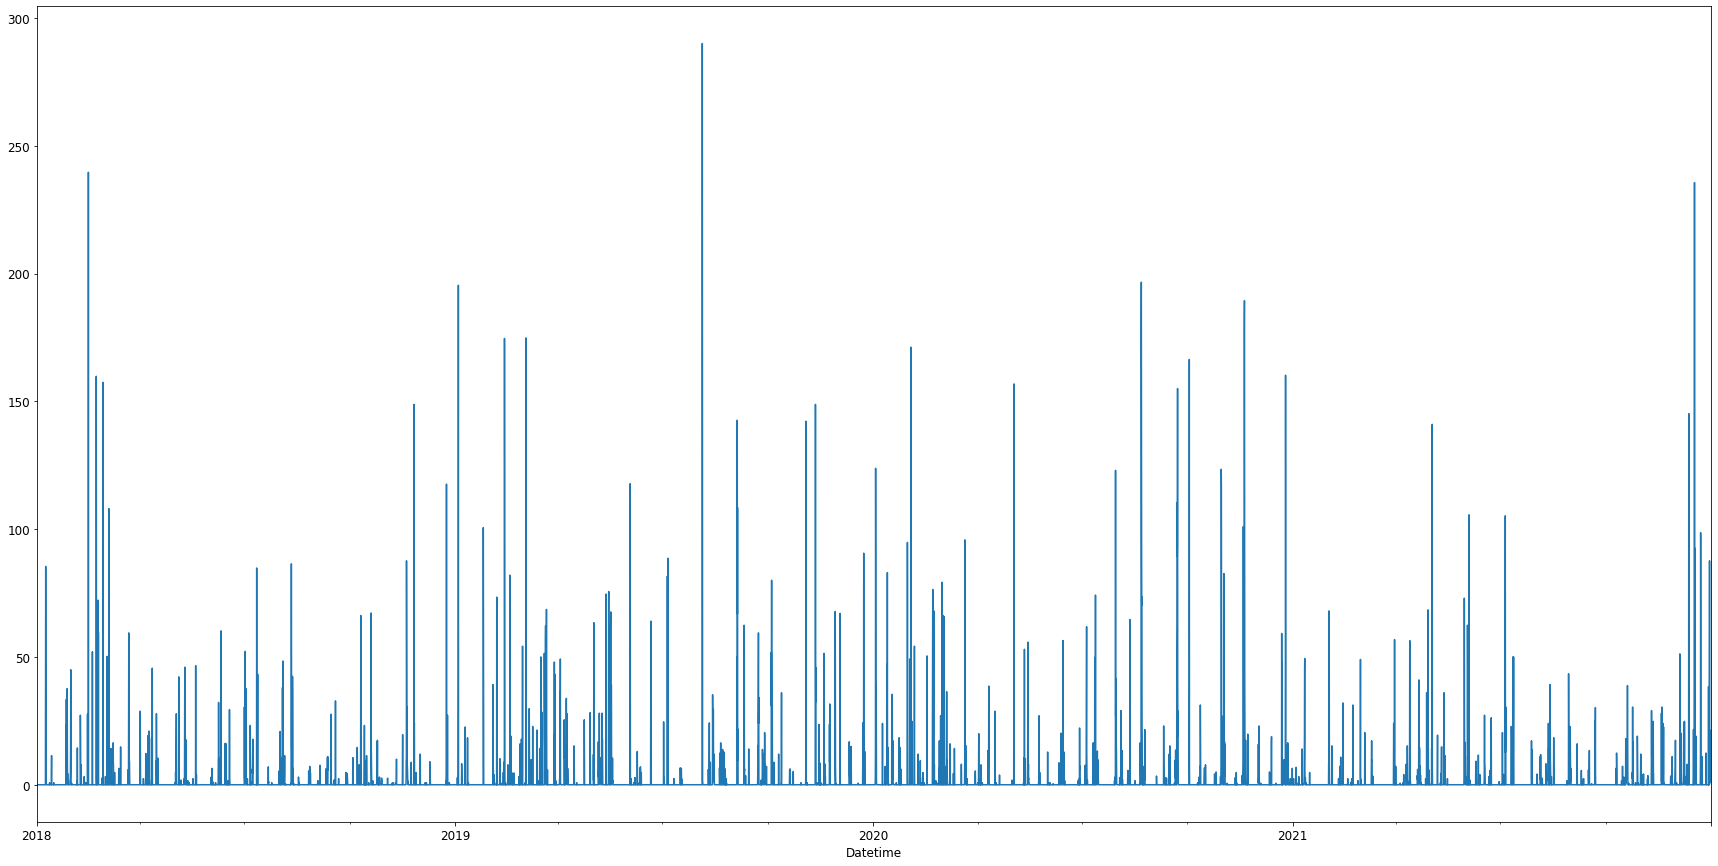

In [ ]:
df_agg_2018_2021.value.plot.line()

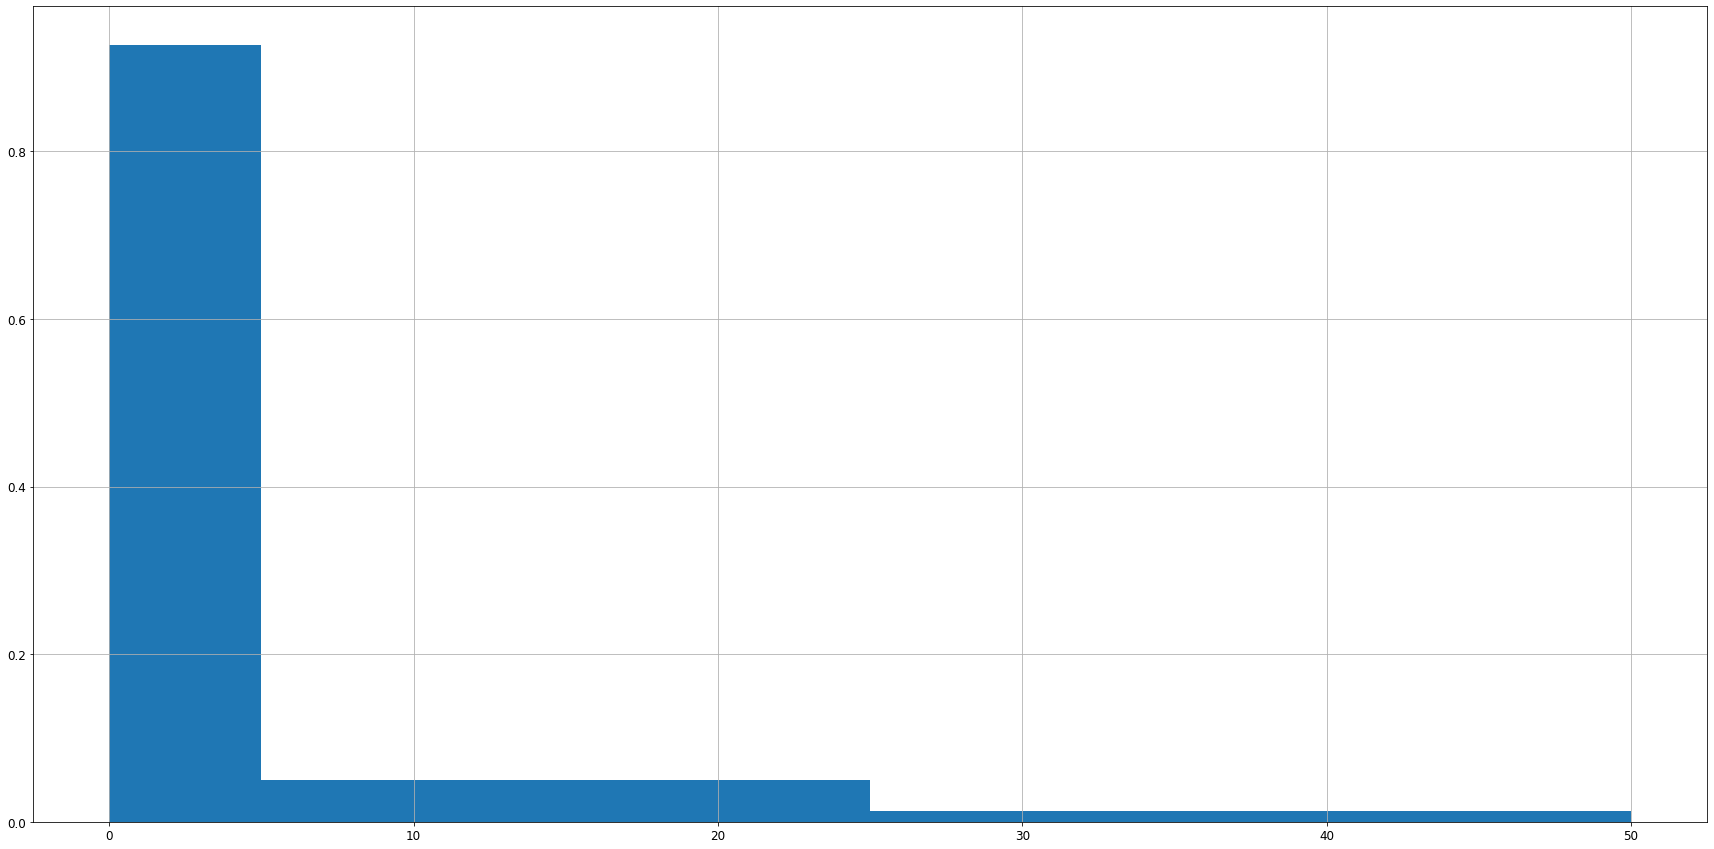

In [ ]:
import numpy as np
n_observations = df_agg_2018_2021.shape[0]
df_agg_2018_2021.value.hist(bins=[0, 5, 25, 50], weights=np.ones(n_observations) / n_observations)

In [ ]:
df_agg_2018_2021.to_csv('tijuca_2018_2021.csv')

# Referências

- [How to create a simple polygon from coordinates in GeoPandas with Python?](https://gis.stackexchange.com/questions/294206/how-to-create-a-simple-polygon-from-coordinates-in-geopandas-with-python)